# Problem Set 2, due April 27th at 3:30 pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 'pobre'|
|progresa |treatment = 'basal'|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [1]:
import sys; print(sys.version)
%matplotlib inline


2.7.11 |Anaconda 4.0.0 (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn 

In [22]:
progresa_data = pd.read_csv('/Users/abhi/Documents/UW/Courses/Spring_Quarter_17/INFX-574/data/Problem_Set_2/progresa_sample.csv')
progresa_data.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

a) Present number of missing observations for every single variable


In [4]:
progresa_data.isnull().sum(axis = 0)

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

b) Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [5]:
x = progresa_data.columns - ['year', 'folnum', 'village']
d= progresa_data[x].describe()
d

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


,age,dist_cap,dist_sec,fam_n,grc,grc97,hohage,hohedu,hohsex,hohwag,indig,min_dist,sc,sc97,sex,welfare_index
count,77250.000000,77250.000000,77250.000000,77250.000000,70701.000000,77250.000000,77240.000000,77250.000000,77230.000000,77250.000000,76950.000000,77250.000000,68797.000000,73378.000000,77226.000000,77040.000000
mean,11.366460,147.674452,2.418910,7.215715,3.963537,3.705372,44.436717,2.768104,0.925185,586.985312,0.298324,103.447520,0.819818,0.813922,0.512211,690.346564
std,3.167744,76.063134,2.234109,2.352900,2.499063,2.572387,11.620372,2.656106,0.263095,788.133664,0.457525,42.089441,0.384342,0.389172,0.499854,139.491130
min,6.000000,9.465392,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,9.465392,0.000000,0.000000,0.000000,180.000000
25%,9.000000,92.327050,0.574000,6.000000,2.000000,1.000000,36.000000,0.000000,1.000000,120.000000,0.000000,70.518238,1.000000,1.000000,0.000000,597.000000
50%,11.000000,132.001494,2.279000,7.000000,4.000000,4.000000,43.000000,2.000000,1.000000,500.000000,0.000000,111.228612,1.000000,1.000000,1.000000,685.000000
75%,14.000000,184.445225,3.582000,9.000000,6.000000,6.000000,51.000000,4.000000,1.000000,750.000000,1.000000,138.446009,1.000000,1.000000,1.000000,770.000000
max,17.000000,359.774457,14.879000,24.000000,14.000000,14.000000,98.000000,20.000000,1.000000,14000.000000,1.000000,170.457647,1.000000,1.000000,1.000000,1294.000000


In [6]:
mean = d[d.index == 'mean'].dropna().T
std = d[d.index == 'std'].dropna().T
pd.concat([mean,std], axis = 1)


,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [7]:
import scipy as sc

In [8]:
prog = progresa_data[progresa_data['year'] == 97]
s = prog[x]
s = s[s['poor'] == 'pobre']
control = s[s['progresa'] != 'basal'].dropna()
treatment = s[s['progresa'] == 'basal'].dropna()
d_control = control.describe()
d_treatment = treatment.describe()
avg_control = d_control[d_control.index == 'mean'].T
avg_control = avg_control.rename(columns = {'mean': 'Average value (Control villages)'})
avg_treatment = d_treatment[d_treatment.index == 'mean'].T
avg_treatment= avg_treatment.rename(columns = {'mean': 'Average value (Treatment villages)'})
test = pd.concat([avg_control,avg_treatment], axis = 1)

In [9]:
diff = [] 
pv = [] 
def calc_diff(s1, s2,diff, pv):
    d, p = sc.stats.ttest_ind(s1,s2)
    diff.append(d)
    pv.append(p)
    return 

In [10]:
for thing in test.index:
    calc_diff(treatment[thing], control[thing], diff, pv)

test['diff'] = diff
test['pv'] = pv
test

,Average value (Control villages),Average value (Treatment villages),diff,pv
age,10.785586,10.743825,-1.156182,2.476155e-01
dist_cap,154.492095,151.801472,-2.927983,3.414194e-03
dist_sec,2.400687,2.399648,-0.041252,9.670949e-01
fam_n,7.302939,7.281032,-0.800187,4.236088e-01
grc,3.733653,3.709214,-0.851002,3.947750e-01
grc97,3.733653,3.709214,-0.851002,3.947750e-01
hohage,44.270717,43.631234,-4.761979,1.925767e-06
hohedu,2.660982,2.726729,2.224346,2.613239e-02
hohsex,0.923387,0.925586,0.709333,4.781232e-01
hohwag,580.694452,550.207086,-3.640301,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

<b> A </b> : There are a few variables that are statistically significant such as hohage whose p-value is 1.925767e-06, min_dist whose p-value is 1.936661e-18, welfare_index whose p-value is 3.724043e-04. However most of the variables aren't lesser than 0.05 and hence aren't statistically significant 
<br>
<b> B </b> : If there are differences at the baseline then we cannot come to the conclusion that the treatment is the only reason that the treatment and control group are different from each other. If there is a difference at the baseline then it could be possible that the two groups haven't been randomized properly 
<br>
<b> C </b> : Since there is no significant difference between the means of treatment and control groups pre-treatment i.e. at the baseline, we can say that the only way to measure impact of the treatment is to see if there is a difference post-treatment. 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

([<matplotlib.axis.XTick at 0x10299a1d0>,
 <a list of 20 Text xticklabel objects>)

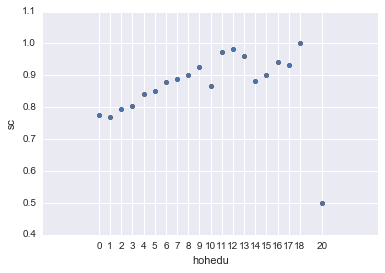

In [11]:
scatter = prog.pivot_table(values='sc', index = 'hohedu')

sframe = pd.DataFrame(scatter)

sframe.reset_index().plot(kind = 'scatter', x = 'hohedu', y = 'sc')
plt.xticks(sframe.index)

We observe that on average the enrollment rate reduces at education level 10 and 20 which could be a transition. For egs: transitioning from secondary school to senior secondary school

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

The average enrollment rate of poor households in treated villages in 1997 is :0.822696523153
The average enrollment rate of poor households in treated villages in 1998 is :0.849257030578
The difference between avg_t2 and avg_t2 is: 0.0265605074256


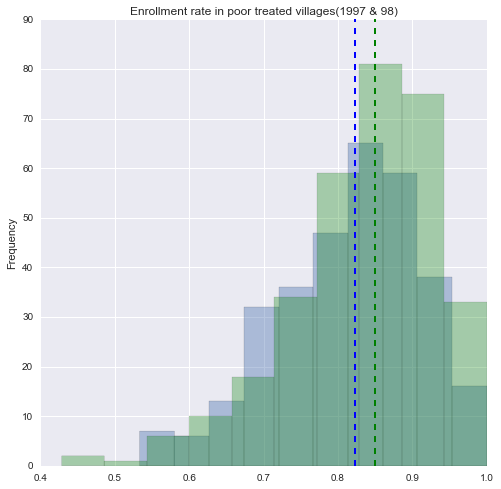

In [12]:
v1 = prog[(prog['poor'] == 'pobre')&(prog['progresa'] == 'basal')].dropna()
v2 = progresa_data[(progresa_data['poor'] == 'pobre')&(progresa_data['progresa']=='basal')&(progresa_data['year']==98)].dropna()
all_avg_v1 = v1['sc'].mean()
print 'The average enrollment rate of poor households in treated villages in 1997 is :{0}'.format(all_avg_v1)

all_avg_v2 = v2['sc'].mean()
print 'The average enrollment rate of poor households in treated villages in 1998 is :{0}'.format(all_avg_v2)

print 'The difference between avg_t2 and avg_t2 is: {0}'.format(all_avg_v2-all_avg_v1)
groupby_v1 = v1.pivot_table(values='sc', index='village')
groupby_v2 = v2.pivot_table(values='sc', index='village')
fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(10)
g1 = groupby_v1.plot(ax = ax, kind='hist', title = 'Enrollment rate in poor treated villages(1997 & 98)', alpha=0.4, figsize = (8,8))
g1.axvline(x = all_avg_v1, linewidth = 2, color ='b', linestyle='--')
g1.axvline(x = all_avg_v2, linewidth = 2, color ='g', linestyle='--')
g2 = groupby_v2.plot(ax= ax, kind='hist', title = 'Enrollment rate in poor treated villages(1997 & 98)', alpha=0.3, color='g', figsize = (8,8))

<b>Part1</b>
<br>There is a difference between the two treatment groups after the treatment was applied and this can be seen in the histrogram made above. The mean enrollment rate for the treatment group pre-treatment was 0.822696523153 and in post-treatment is 0.849257030578, thus we can see that there is an improvement in enrollment 
<br>
<br>
<b>Part2</b>
<br> This is a single difference estimator where we subtract post-treatment and pre-treatment 

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

Let's set our Null and Alternate Hypothesis. <br>
<b>Null Hypothesis (H0) : mu1 = mu2 <br>
Alternate Hypothesis (H1) : mu1 != mu2 </b>

and consider our <b>significance level </b>to be <b>0.05</b>

In [13]:
new_data = progresa_data[progresa_data['year'] == 98]
new_t = new_data[(new_data['poor'] == 'pobre')&(new_data['progresa'] == 'basal')]
new_c = new_data[(new_data['poor'] == 'pobre')&(new_data['progresa'] != 'basal')]
avg_e_t = new_t.pivot_table(index= 'village', values = 'sc', aggfunc = 'mean')
avg_e_x = new_c.pivot_table(index = 'village', values = 'sc', aggfunc = 'mean')
print 'Part1'
print 'Treatment group average enrollment rate post-treatment:{0}'.format(new_t['sc'].dropna().mean())
print 'Control group average enrollment rate post-treatment:{0}'.format(new_c['sc'].dropna().mean())
t = []
p = [] 
calc_diff(new_t['sc'].dropna(), new_c['sc'].dropna(), t, p)
print t
print p 

Part1
Treatment group average enrollment rate post-treatment:0.846479121395
Control group average enrollment rate post-treatment:0.80763695673
[8.3587205674183735]
[6.636344447523235e-17]


Part2 <br>
The difference estimator that is used from Schultz (2004) is post-program period average (St1 - St2) <br><br>
Part3<br>
From above we can see that our p-value for the t-test is 6.636344447523235e-17 which is lesser than the sigficance level we chose. And thus we reject the null hypothesis and can say that there is a significant difference between the means of the two groups - the control and treatment group after PROGRESA was adopted in 1998. We can see how the mean for control group in 1998 is 0.80763695673 and the mean for treatment group is : 0.846479121395


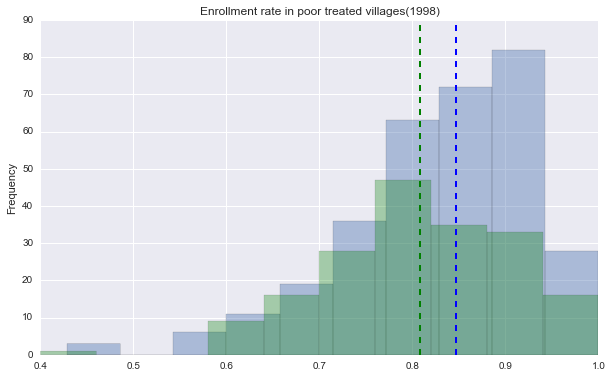

In [14]:
all_avg_t = new_t['sc'].dropna().mean()
all_avg_c = new_c['sc'].dropna().mean()
fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(10)
g1 = avg_e_t.plot(ax = ax, kind='hist', title = 'Enrollment rate in poor treated villages(1998)', alpha=0.4)
g1.axvline(x = all_avg_t, linewidth = 2, color ='b', linestyle='--')
g1.axvline(x = all_avg_c, linewidth = 2, color ='g', linestyle='--')
g2 = avg_e_x.plot(ax= ax, kind='hist', title = 'Enrollment rate in poor treated villages(1998)', alpha=0.3, color='g')

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [15]:
# converting the progresa column to binary for sake of regression 

def convert_to_binary(progres):
        if progres == 'basal':
            return 1
        else:
            return 0

X = np.matrix([convert_to_binary(progres) for progres in new_data.dropna()['progresa']]).T
y = np.matrix(new_data.dropna()['sc']).T

# now let's create a Linear Regression Model using scikit-learn 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

In [16]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     71.58
Date:                Sun, 30 Apr 2017   Prob (F-statistic):           2.78e-17
Time:                        18:49:33   Log-Likelihood:                -13483.
No. Observations:               30665   AIC:                         2.697e+04
Df Residuals:                   30663   BIC:                         2.699e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8064      0.003    231.843      0.0

Based on this model, how much did Progresa increase the likelihood of a child enrolling?
<br>
<b> A1 </b>
Based on this model Progresa increased the likelihood of a child enrolling by 0.0374 
<br><br>
How does your regression estimate compare to your t-test estimate from part 2.1?
<br>
<b> A2 </b>
The t-test estimate from part 2.1 was 8.3587 but this represented the different between the treatment and control groups, post-treatment. The regression estimate obtained for progressa is representative for one child, that is progresa increases likelihood of getting enrolled by 0.0374 
<br><br>
Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
<br>
<b> A3 </b>
Based on this model, we can reject the null hypothesis that the treatment effects are zero as progresa is associated with enrollment rate as seen in the regression model and it is statistically significant.  
<br><br>
What is the counterfactual assumption underlying this regression?
<br>
<b> A4 </b>
The counterfactual assumption is that if the treatment was not provided then the treatment group would be same as the control group 

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [17]:
def pre_post(year):
    if year == 97:
        return 0 
    else:
        return 1 

In [18]:
new_data['progresa'] = [convert_to_binary(progres) for progres in new_data['progresa']]
new_data['post'] = [pre_post(x) for x in new_data['year']]

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
import statsmodels.formula.api as sm
result = sm.ols(formula="sc ~ progresa + age + dist_sec + sex + hohedu + indig", data=new_data).fit()
print result.params
print result.summary()

Intercept    1.527958
progresa     0.034069
age         -0.065834
dist_sec    -0.012201
sex          0.031015
hohedu       0.009469
indig        0.046251
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1955.
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:49:34   Log-Likelihood:                -9337.7
No. Observations:               31975   AIC:                         1.869e+04
Df Residuals:                   31968   BIC:                         1.875e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

<b>How do the controls affect the point estimate of treatment effect?</b>
<br><br>
The controls reduce the point estimate as the controls also contribute towards predicting enrollment rate. However it just reduces from 0.0374 to 0.0341.
<br><br>

<b>How do the controls affect the standard error on the treatment effect?</b>
The controls don't significantly affect the standard error on the treatment effect
<br><br>

<b>How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?</b>
<br><br>
Since we add more variables to the model, the estimate in 2.2 for progresa reduces as the other variables explain the outcome variable


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages'.
* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [26]:
# creating binary varibales for pre-post treatment and also treatment or control
progresa_data['progresa'] = [convert_to_binary(progres) for progres in progresa_data['progresa']]
progresa_data['post'] = [pre_post(x) for x in progresa_data['year']]

In [24]:
# creating binary varibales for pre-post treatment and also treatment or control


#calculating averages for poor households in treatment villages 
avg_sc_t1 = progresa_data[(progresa_data['year'] == 97) & (progresa_data['progresa'] == 1)]['sc'].dropna().mean()
avg_sc_t2 = progresa_data[(progresa_data['year'] == 98) & (progresa_data['progresa'] == 1)]['sc'].dropna().mean()

#calculating averages for poor households in non-treatment villages 
avg_sc_c1 = progresa_data[(progresa_data['year'] == 97) & (progresa_data['progresa'] == 0)]['sc'].dropna().mean()
avg_sc_c2 = progresa_data[(progresa_data['year'] == 98) & (progresa_data['progresa'] == 0)]['sc'].dropna().mean()


print "Average for poor households that were in the treatment group in 1997 (pre-treatment): {0}".format(avg_sc_t1)
print "Average for poor households that were in the treatment group in 1998 (post-treatment): {0}".format(avg_sc_t2)
print "Difference in the means of the treatment group, pre and post treatment: {0}".format(avg_sc_t2 - avg_sc_t1)

print '\n'

print "Average for poor households that were in the control group in 1997 (pre-treatment): {0}".format(avg_sc_c1)
print "Average for poor households that were in the control group in 1998 (post-treatment): {0}".format(avg_sc_c2)
print "Difference in the means of the control group, pre and post treatment: {0}".format(avg_sc_c2 - avg_sc_c1)


print 'Difference in Difference: {0}'.format(avg_sc_t2 - avg_sc_t1 - (avg_sc_c2 - avg_sc_c1))

Average for poor households that were in the treatment group in 1997 (pre-treatment): 0.818495422582
Average for poor households that were in the treatment group in 1998 (post-treatment): 0.841181809015
Difference in the means of the treatment group, pre and post treatment: 0.0226863864329


Average for poor households that were in the control group in 1997 (pre-treatment): 0.806577638869
Average for poor households that were in the control group in 1998 (post-treatment): 0.802916734561
Difference in the means of the control group, pre and post treatment: -0.0036609043083
Difference in Difference: 0.0263472907412


<b>Part1</b>
The estimate of the impact is 0.0263. The result is relatively smaller than the earliar results. 
<br><br>

<b>Part2</b>
The counterfactual assumption is that the average change in the comparison group represents the counterfactual change in the treatment group if there were no treatment. 

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [27]:
import statsmodels.formula.api as sm
result = sm.ols(formula="sc ~ progresa + post + progresa:post + age + dist_sec ", data=progresa_data.dropna()).fit()
print result.params
print result.summary()

Intercept        1.557568
progresa         0.008628
post             0.034373
progresa:post    0.025914
age             -0.066155
dist_sec        -0.011840
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     4960.
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:51:04   Log-Likelihood:                -20317.
No. Observations:               67122   AIC:                         4.065e+04
Df Residuals:                   67116   BIC:                         4.070e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err    

<b> Part1 </b>
<br>
The estimate of progresa by itself is not significant in diff and diff regression. We can see that the p-value is also not so significant ( 0.015) . However, we observe that the interaction term progresa:post, where progresa tells us whether it is a treatment group or not and post tells us whether the year is 97 or 98, is significant and is similar to the estimate that we obtained from the tabular version.
<br><br>
<b> Part2 </b>
<br>
The estimates of the treatment effect are smaller compared to those from simple difference. Because in simple difference we only observed difference between treatment and control post-treatment whereas here we see an overall difference between the differences withing groups.
<br><br>



<b> Part3 </b>
<br>
These estimates are pretty similar to the estimates obtained in the tabular version of difference in difference. The estimate here is 0.0259 and earlier it was 0.0263. The other terms that are involved in the regression that explain enrollment rate account for this difference between the two estimates. 
<br><br>

<b> Part4 </b>
<br>
The counterfactual assumption underlying this regression is that the difference between the difference in treatment and control groups wouldn't exist without the treatment 

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [28]:
def convert_poor(d):
    if d == 'pobre':
        return 1
    else:
        return 0

new_data['poor'] = [convert_poor(d) for d in new_data['poor']]

In [29]:
import statsmodels.formula.api as sm
result = sm.ols(formula="sc ~ progresa + poor + progresa:poor + age + dist_sec ", data=new_data.dropna()).fit()
print result.params
print result.summary()

Intercept        1.602336
progresa         0.029568
poor            -0.011657
progresa:poor    0.005949
age             -0.066144
dist_sec        -0.012117
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2097.
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:51:12   Log-Likelihood:                -9008.7
No. Observations:               30665   AIC:                         1.803e+04
Df Residuals:                   30659   BIC:                         1.808e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err    

<b> Part1 </b>
<br>
In this model we only consider post-treatment. We observe that the progresa estimate helps in explaining enrollment rate (0.0296) and it's similar to the estimates that we obtained in earlier regression estimates. We see that the estimate for the variable poor is negatively associated with enrollment rate which means that if a person is not poor they have higher chances of being enrolled. However this estimate is not significant as p-value is 0.163. We also see that the interaction term between progresa and post is not significant.   
<br><br>
<b> Part2 </b>
<br>
The counterfactual assumption here is that there would be no difference between poor and non-poor treated and control villages without the treatment 
<br><br>



<b> Part3 </b>
<br>
The treatment effects here are different compared to the estimates we obtained in 2.5 as here we are considering only difference between poor and non-poor villages. The progresa term is the one that is significant and gives us the likelihood of enrollment rate. 
<br><br>

<b> Part4 </b>
<br>
The differences are that here we are comparing only post-treatment between poor and non-poor treated and controlled villages. Whereas earlier we were comparing the treated and controlled villaged over a period of time. This is why we observe differences in the two models. The one similarity is that the variable progresa which indicates treated or not treated gives us the likelihood of enrollment rate. 

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [32]:
not_poor_data =new_data[new_data['poor'] == 0]
result = sm.ols(formula="sc ~ progresa + post + progresa:post + age + dist_sec ", data=not_poor_data.dropna()).fit()
print result.params
print result.summary()

Intercept        0.825933
progresa         0.014478
post             0.825933
progresa:post    0.014478
age             -0.069473
dist_sec        -0.016511
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     507.0
Date:                Sun, 30 Apr 2017   Prob (F-statistic):          7.44e-284
Time:                        18:54:19   Log-Likelihood:                -1618.6
No. Observations:                4510   AIC:                             3245.
Df Residuals:                    4506   BIC:                             3271.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err    

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?